<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n20.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,59.837167,47.557032,90.310034,-0.386465,207.317767,207.688080,-0.370313
1,0.0,1.0,75.674532,91.339845,76.405294,-0.139933,253.279738,253.249903,0.029835
2,0.0,2.0,28.209482,93.921958,86.932449,0.261898,219.325787,218.940445,0.385342
3,0.0,3.0,44.591013,84.299018,62.251748,-0.535988,200.605791,201.040851,-0.435060
4,0.0,4.0,30.271510,53.775244,26.158386,-0.303541,119.901599,120.238217,-0.336618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,46.754826,93.334004,61.622004,0.478460,212.189294,211.878528,0.310766
119996,999.0,116.0,34.189810,32.265831,98.922579,-0.652153,174.726068,175.396032,-0.669965
119997,999.0,117.0,42.158145,95.077127,44.547026,0.597034,192.379332,191.872218,0.507114
119998,999.0,118.0,32.727838,37.332215,76.422779,0.485877,156.968709,156.411666,0.557043


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    59.837167  47.557032  90.310034  ...  207.317767  207.688080 -0.370313
      1.0    75.674532  91.339845  76.405294  ...  253.279738  253.249903  0.029835
      2.0    28.209482  93.921958  86.932449  ...  219.325787  218.940445  0.385342
      3.0    44.591013  84.299018  62.251748  ...  200.605791  201.040851 -0.435060
      4.0    30.271510  53.775244  26.158386  ...  119.901599  120.238217 -0.336618
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  46.754826  93.334004  61.622004  ...  212.189294  211.878528  0.310766
      116.0  34.189810  32.265831  98.922579  ...  174.726068  175.396032 -0.669965
      117.0  42.158145  95.077127  44.547026  ...  192.379332  191.872218  0.507114
      118.0  32.727838  37.332215  76.422779  ...  156.968709  156.411666  0.557043
      119.0  21.694145  23.282954  94.055823  ...  149.227695  148.979796  0.247899

[120000 rows x 7 columns]

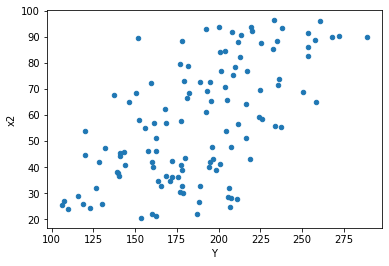

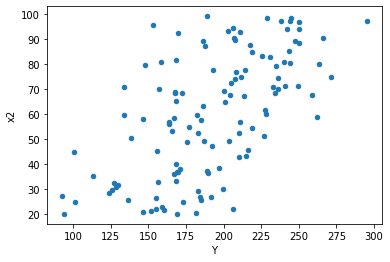

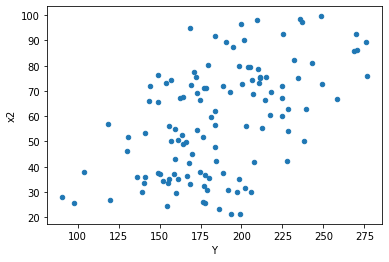

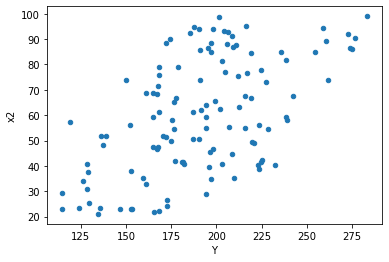

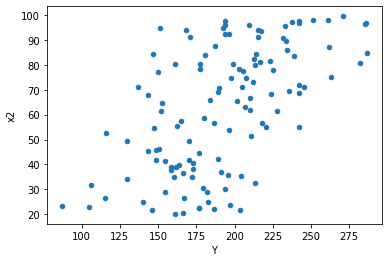

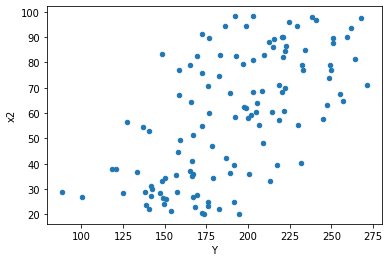

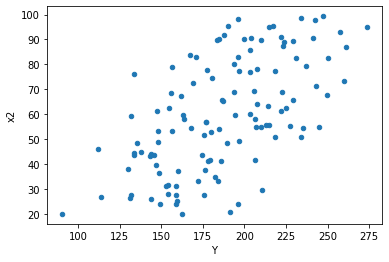

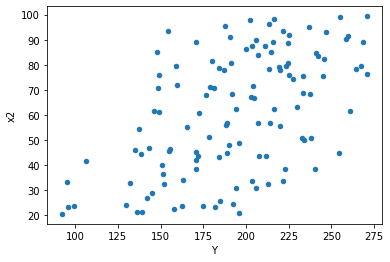

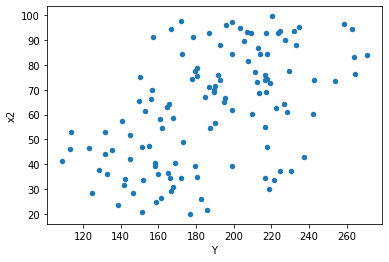

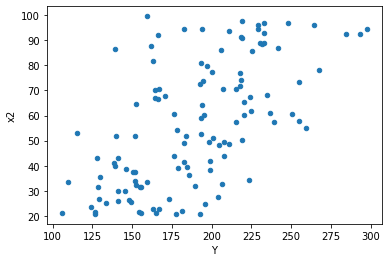

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,45.0,45.0,15.433720987716297,22.982152622888893,0.3429715775048066,0.5107145027308643,1.4890869571362857,0.185583307277432,0.907208346361284,0.092791653638716,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,26.582275167733425,26.720564310144578,0.5907172259496316,0.5937903180032128,1.0052023064819904,0.9861913710782804,0.5069043144608598,0.4930956855391402,Reject001=1 : Homoscedasticity
9.0,45.0,45.0,16.54506301514313,24.527001149485955,0.3676680670031806,0.5450444699885768,1.4824362486282001,0.19054420194606125,0.9047278990269694,0.09527210097303063,Reject001=1 : Homoscedasticity
11.0,45.0,45.0,19.52032049296747,20.018135525553287,0.4337848998437216,0.44484745612340637,1.0255024005761155,0.9330595122450118,0.5334702438774941,0.4665297561225059,Reject001=1 : Homoscedasticity
13.0,45.0,45.0,19.27696894476623,26.597231826001142,0.4283770876614718,0.5910495961333587,1.3797413847690194,0.2839897049550979,0.858005147522451,0.14199485247754895,Reject001=1 : Homoscedasticity
14.0,45.0,45.0,25.109079316739656,25.841733063766707,0.5579795403719924,0.5742607347503713,1.029178837574447,0.9235745152965007,0.5382127423517497,0.46178725764825035,Reject001=1 : Homoscedasticity
16.0,45.0,45.0,19.495676012253277,29.680210558901855,0.43323724471673947,0.6595602346422634,1.5223996613529827,0.16247394193004672,0.9187630290349766,0.08123697096502336,Reject001=1 : Homoscedasticity
18.0,45.0,45.0,21.074800607293923,27.300164034972923,0.4683289023843094,0.6066703118882871,1.2953937047226163,0.38863889928836914,0.8056805503558154,0.19431944964418457,Reject001=1 : Homoscedasticity
20.0,45.0,45.0,29.939973503985193,32.44524176117726,0.6653327445330043,0.7210053724706057,1.0836763685465052,0.7886959884585301,0.605652005770735,0.39434799422926503,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,23.358654096699908,16.89280686708627,0.5190812021488869,0.3753957081574727,0.7231926461667529,0.28074987524080913,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,20.765409926492268,13.636275349122574,0.4614535539220504,0.30302834109161275,0.6566822132283348,0.16220885917385877,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,24.135124103371233,19.466592599321523,0.5363360911860274,0.43259094665158937,0.8065669153365735,0.47377707655596596,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,30.770160224875198,14.610972251893884,0.68378133833056,0.3246882722643085,0.4748422544801079,0.014029151217246344,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,28.333580792496118,14.44402600239196,0.629635128722136,0.3209783556087102,0.5097847006410613,0.025963899369573676,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,19.90591231910794,15.362959344024215,0.44235360709128757,0.34139909653387146,0.7717787106535737,0.38819537220466893,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,26.136095644666312,22.790058651724962,0.5808021254370291,0.5064457478161103,0.87197640235051,0.6478397342039431,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,15.433720987716297,22.982152622888893,0.3429715775048066,0.5107145027308643,1.4890869571362857,0.185583307277432,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,26.582275167733425,26.720564310144578,0.5907172259496316,0.5937903180032128,1.0052023064819904,0.9861913710782804,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      929
Reject001=0 : Heteroscedasticity     71
Name: Result_test, dtype: int64